# 05. forecast(시계열 분석)

### 1. 설치

pandas-datareader

fbprophet

In [4]:
from pandas_datareader import data
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import set_matplotlib_hangul

### 함수(def)의 기초

In [2]:
def test(a, b):
    return a + b

In [3]:
c = test(2, 3)
c

5

In [4]:
5 + c

10

In [5]:
a = 1

def edit_a(i):
    global a
    a = i


In [6]:
edit_a(2)

In [7]:
a

2

$$y = asin(2\pi ft + t_0) + b $$

In [8]:
def plotSineWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "sin(2*pi" + str(freq) + "*t + " + str(startTime) + ")+" +str(bias))
    plt.show()

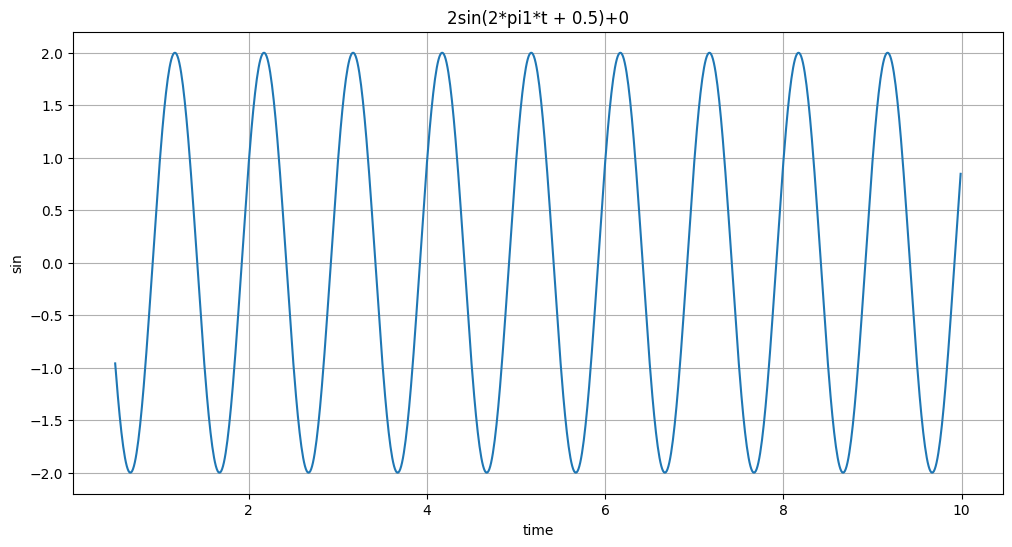

In [9]:
plotSineWave(2, 1, 10, 0.01, 0.5, 0)

In [11]:
def plotSineWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    endTime = kwargs.get('endTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias', 0)
    figsize = kwargs.get('figsize', (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('time')
    plt.ylabel('sin')
    plt.title(str(amp) + "sin(2*pi" + str(freq) + "*t + " + str(startTime) + ")+" +str(bias))
    plt.show()

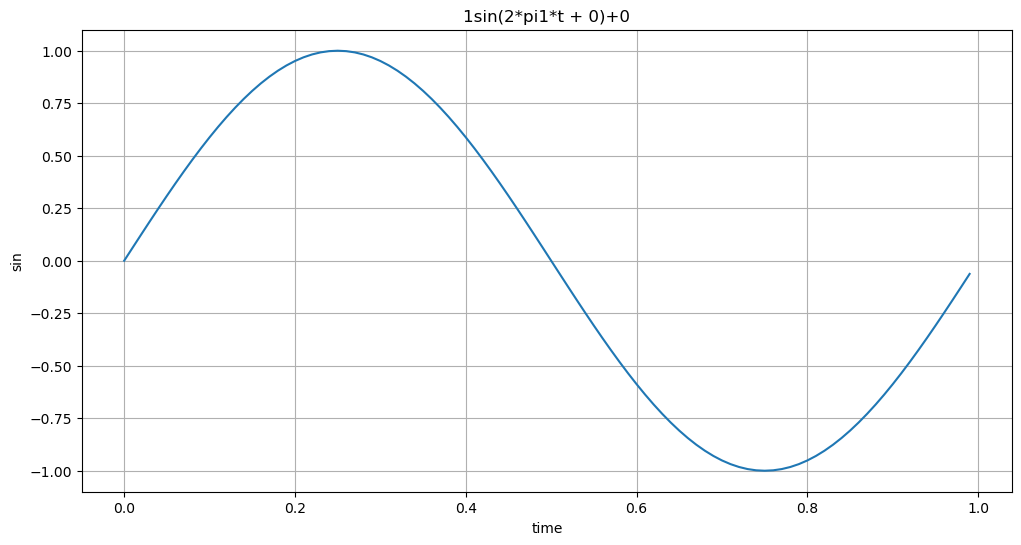

In [12]:
plotSineWave()

In [13]:
import drawSineWave as ds

C:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HoJin\anaconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45397 (\N{HANGUL SYLLABLE NYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


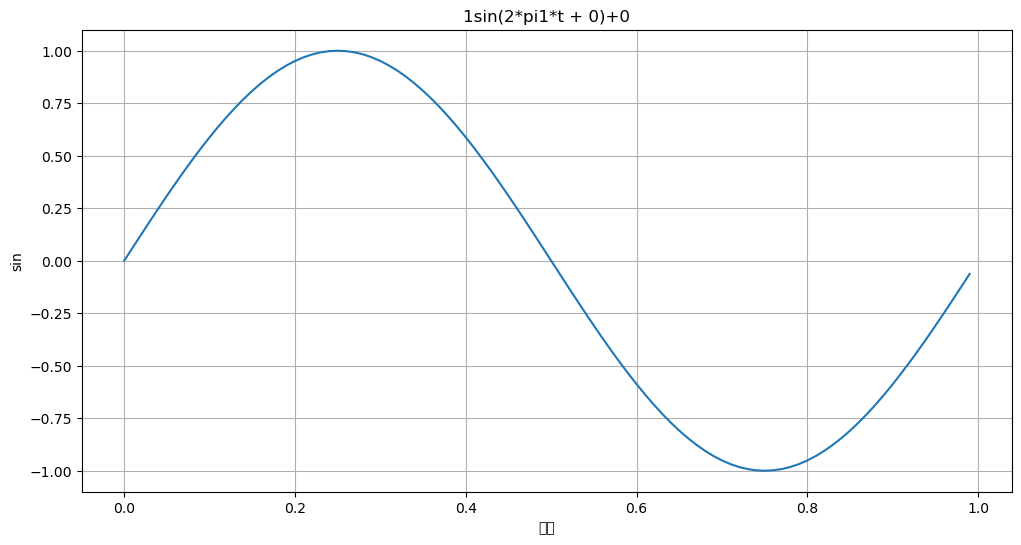

In [14]:
ds.plotSineWave()

In [16]:
def plotSineWave(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    amp = kwargs.get('amp', 1)
    freq = kwargs.get('freq', 1)
    endTime = kwargs.get('endTime', 1)
    sampleTime = kwargs.get('sampleTime', 0.01)
    startTime = kwargs.get('startTime', 0)
    bias = kwargs.get('bias', 0)
    figsize = kwargs.get('figsize', (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel('시간')
    plt.ylabel('사인')
    plt.title(str(amp) + "sin(2*pi" + str(freq) + "*t + " + str(startTime) + ")+" +str(bias))
    plt.show()

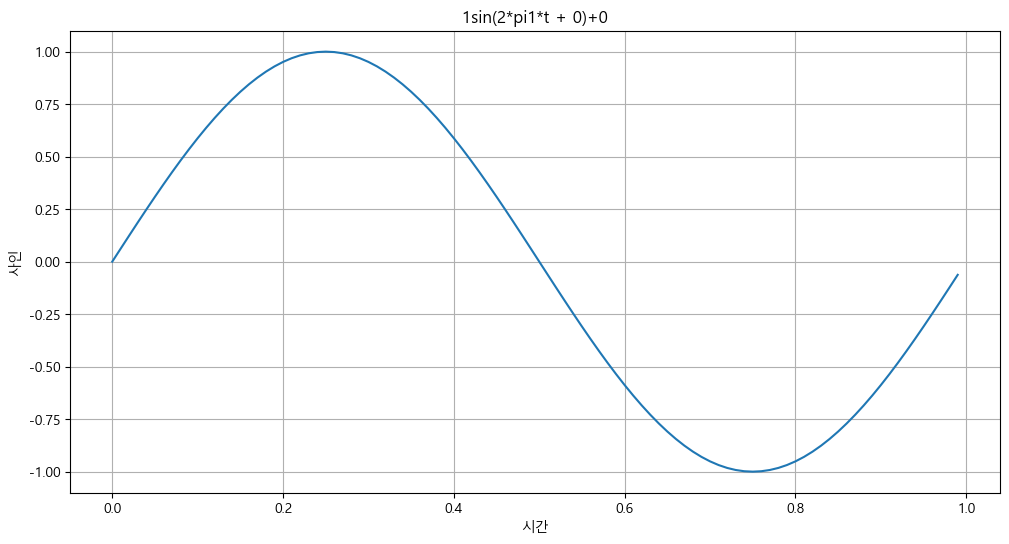

In [17]:
plotSineWave()

In [2]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2 * np.pi * 12 * time)
ds = pd.date_range('2021-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y':result})
df.head()

,ds,y
0,2021-01-01,0.000000
1,2021-01-02,0.103243
2,2021-01-03,0.205382
3,2021-01-04,0.305326
4,2021-01-05,0.402007


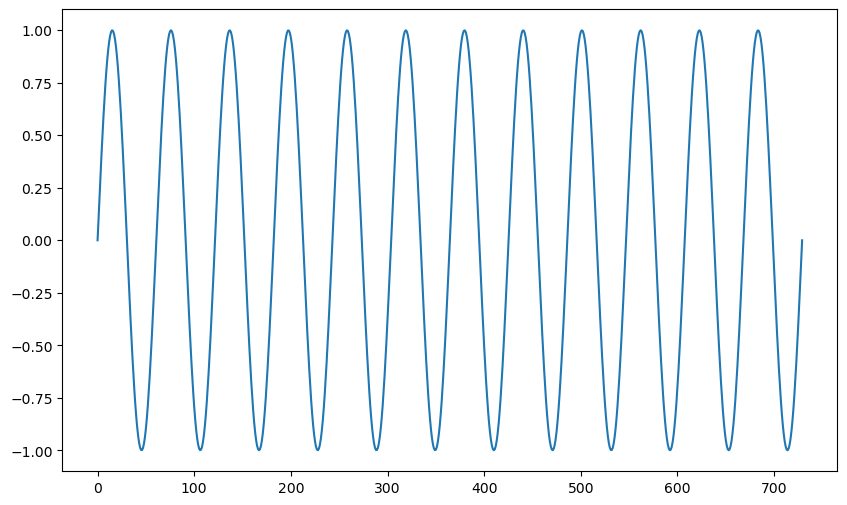

In [3]:
df['y'].plot(figsize=(10,6));

In [4]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

19:54:44 - cmdstanpy - INFO - Chain [1] start processing
19:54:45 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods =30)
forecast = m.predict(future)

In [1]:
m.plot(forecast);

NameError: name 'm' is not defined

#### 2

<Axes: >

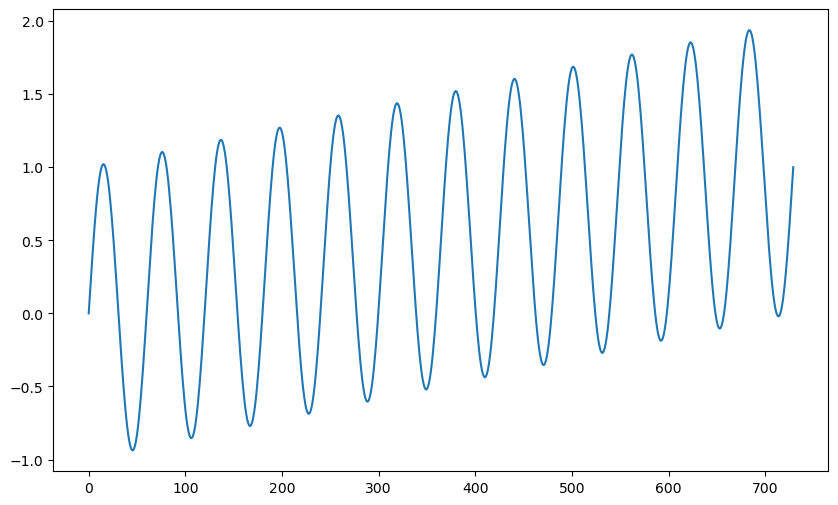

In [5]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2 * np.pi * 12 * time) + time
ds = pd.date_range('2021-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y':result})

df['y'].plot(figsize=(10,6))

In [6]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);
future = m.make_future_dataframe(periods =30)
forecast = m.predict(future)

20:15:14 - cmdstanpy - INFO - Chain [1] start processing
20:15:15 - cmdstanpy - INFO - Chain [1] done processing


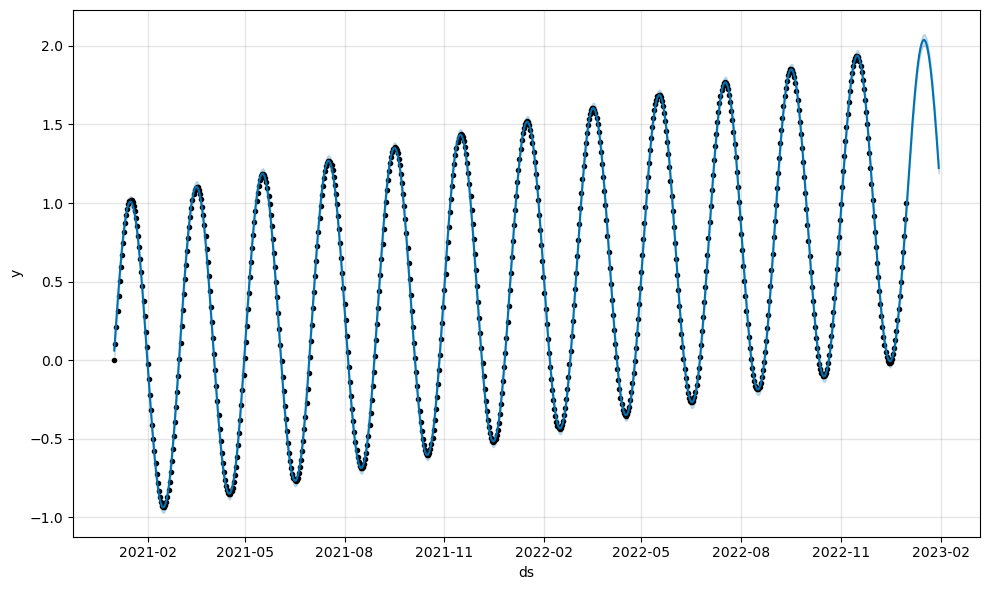

In [7]:
m.plot(forecast);

<Axes: >

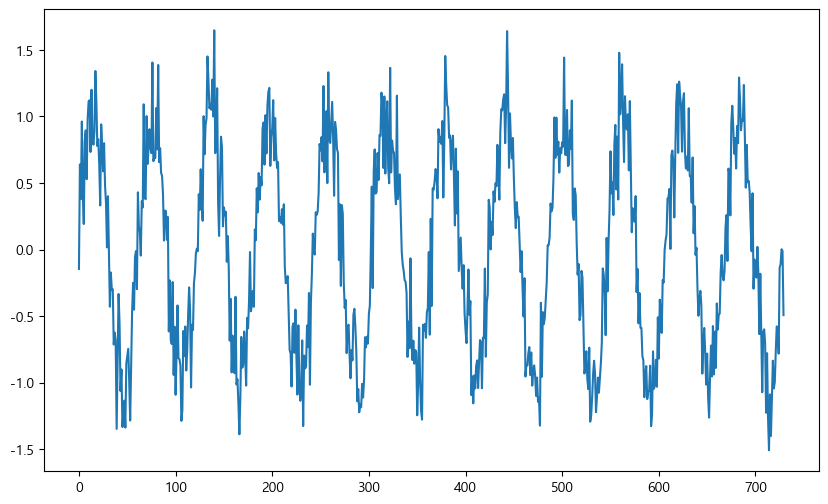

In [12]:
time = np.linspace(0, 1, 365 * 2)
result = np.sin(2 * np.pi * 12 * time) + np.random.randn(365*2)/4
ds = pd.date_range('2021-01-01', periods=365*2, freq='D')
df = pd.DataFrame({'ds': ds, 'y':result})

df['y'].plot(figsize=(10,6))

In [18]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);
future = m.make_future_dataframe(periods =30)
forecast = m.predict(future)

18:57:56 - cmdstanpy - INFO - Chain [1] start processing
18:57:56 - cmdstanpy - INFO - Chain [1] done processing


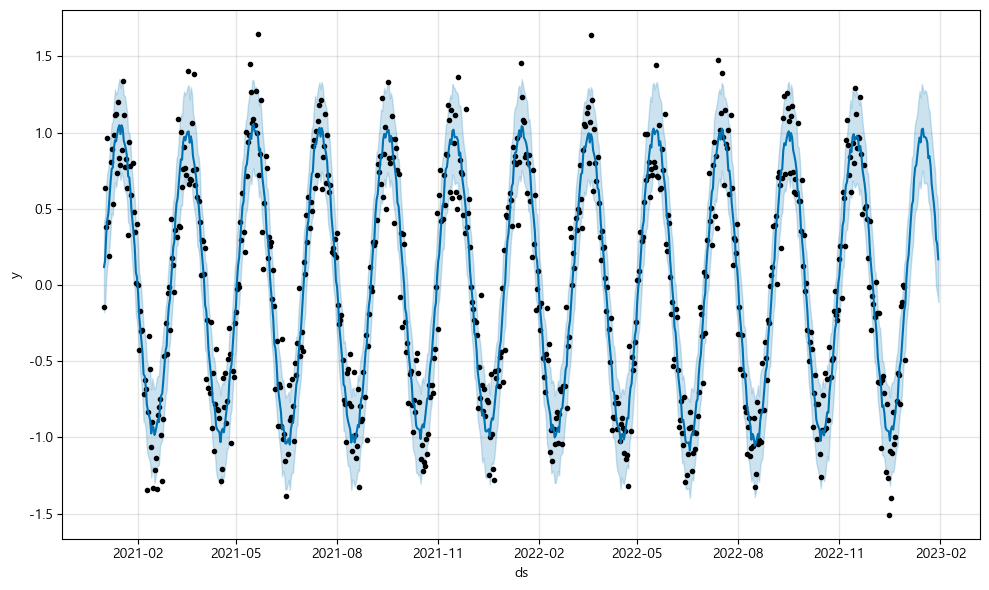

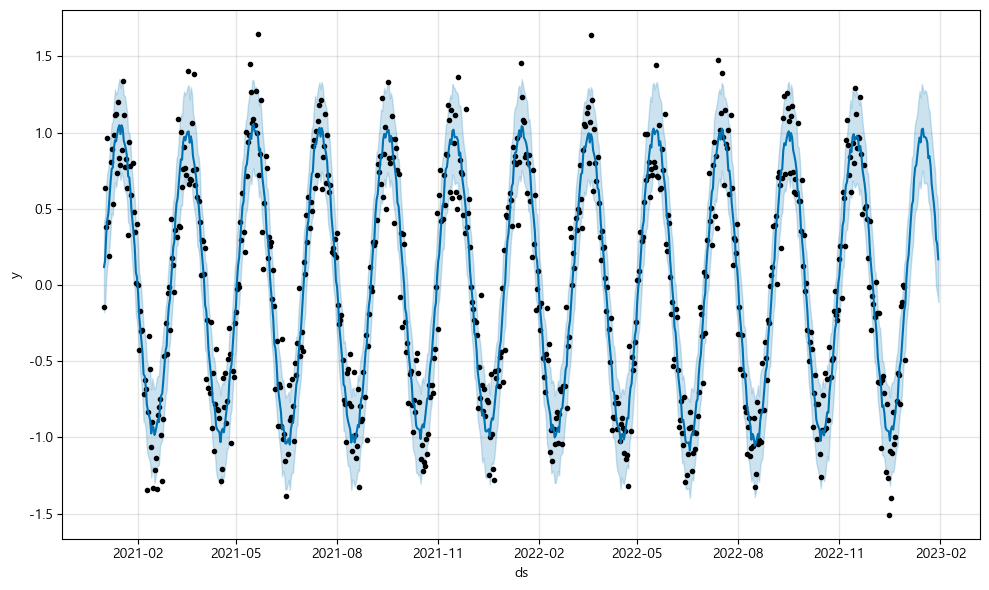

In [19]:
m.plot(forecast)

## 3. 시계열데이터 분석하기

In [17]:
import pandas_datareader as web
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
# import set_matplotlib_hangul

In [25]:
pinkwink_web = pd.read_csv('../05. forecast/data/05_PinkWink_Web_Traffic.csv',
                          encoding='utf-8',
                          thousands=',',
                           names=['date', 'hit'],
                           index_col=0
                          )
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


<Axes: xlabel='date'>

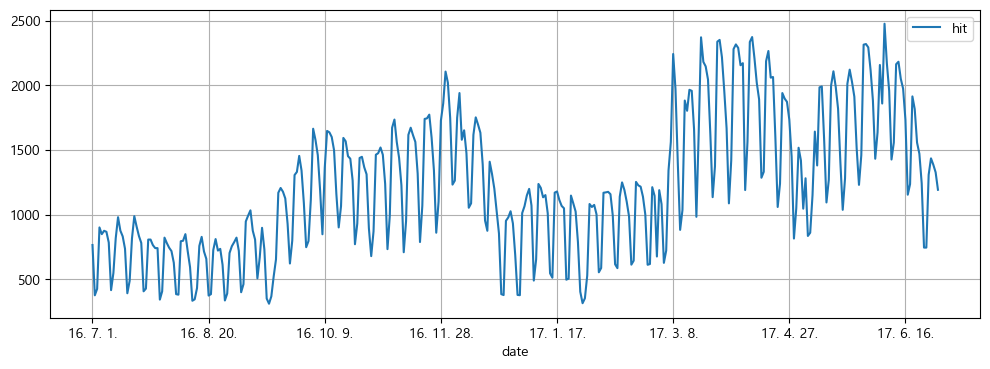

In [26]:
# 전체 데이터 그려보기
pinkwink_web.plot(figsize=(12,4),grid=True)

In [31]:
# trend 분석을 시각화하기위한 x축 값 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values
fx = np.linspace(0, time[-1], 1000)

In [32]:
time[-1]

364

In [38]:
# 에러계산 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [39]:
fp1 = np.polyfit(time, traffic, 1)
f1= np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2= np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3= np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15= np.poly1d(f15p)


In [40]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.47773079342267


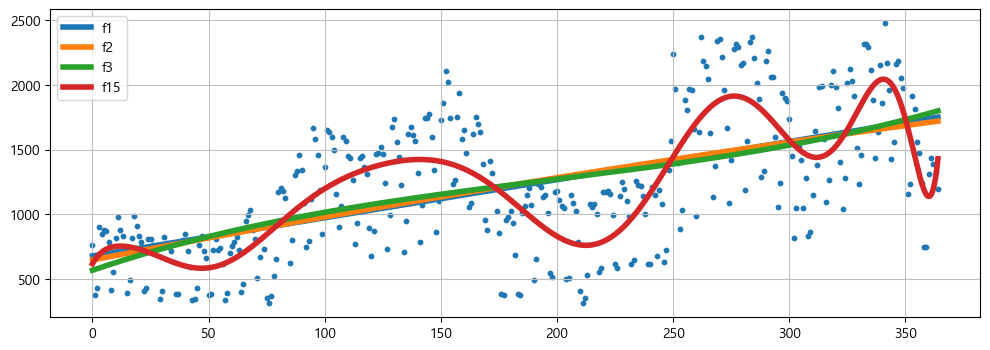

In [41]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)
plt.show()

In [45]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [46]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

19:16:52 - cmdstanpy - INFO - Chain [1] start processing
19:16:52 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
pip uninstall pystan

^C
Note: you may need to restart the kernel to use updated packages.


In [48]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [50]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,921.853195,708.242254,1129.483672
421,2017-08-26,506.954908,302.208815,717.109239
422,2017-08-27,639.454293,438.294861,839.729019
423,2017-08-28,1191.944049,988.346610,1393.547147
424,2017-08-29,1227.806799,1008.645283,1450.338976


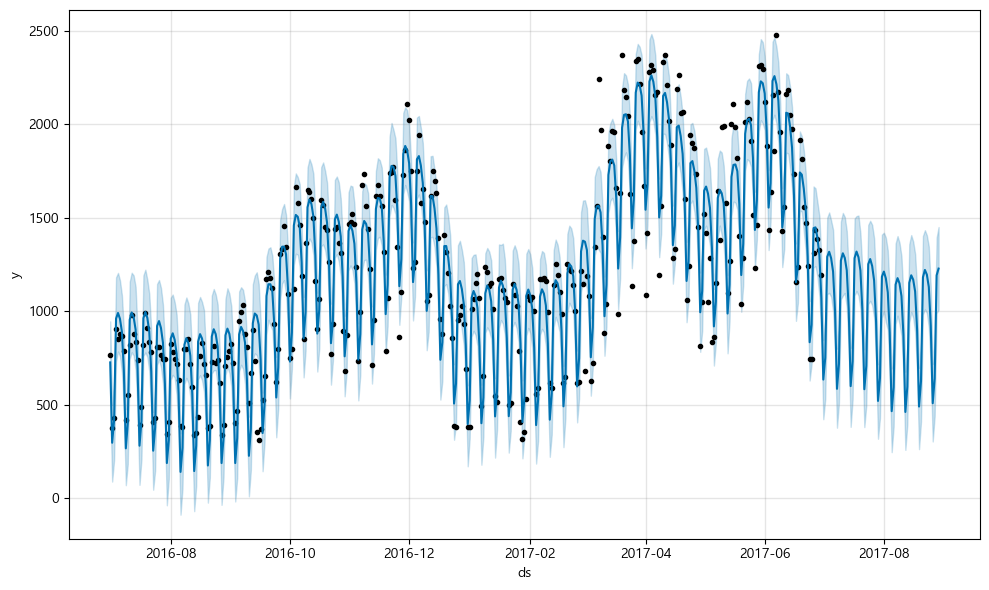

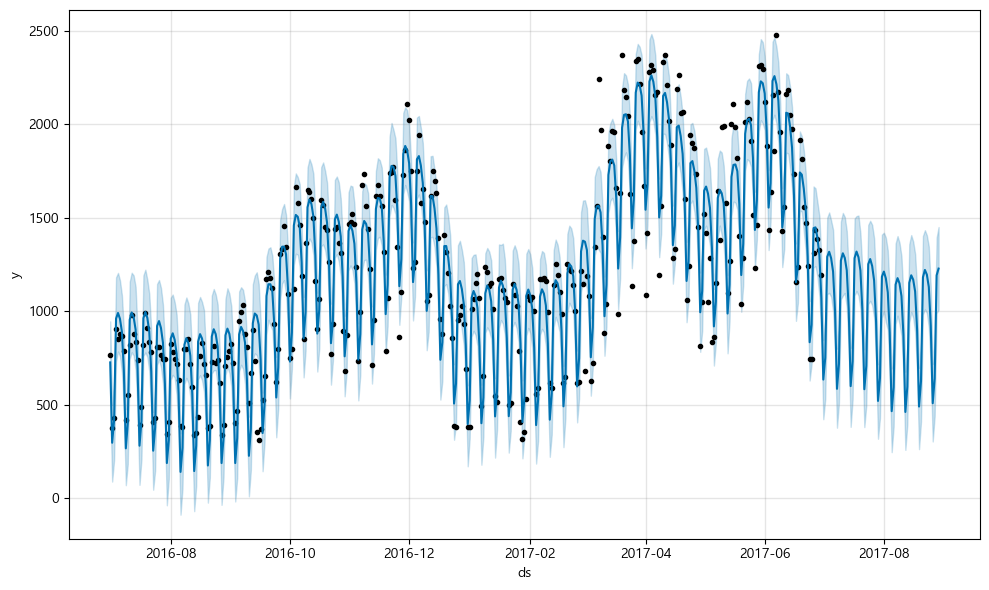

In [51]:
m.plot(forecast)

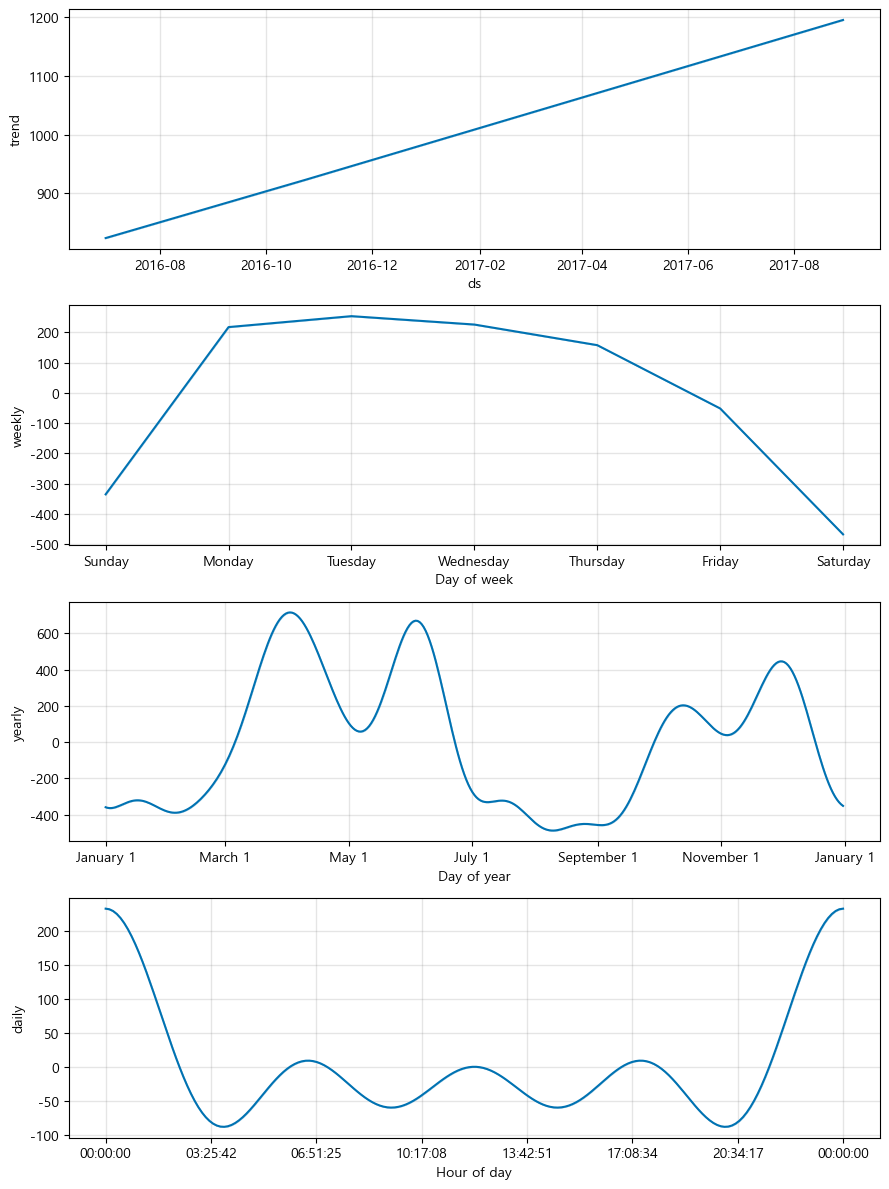

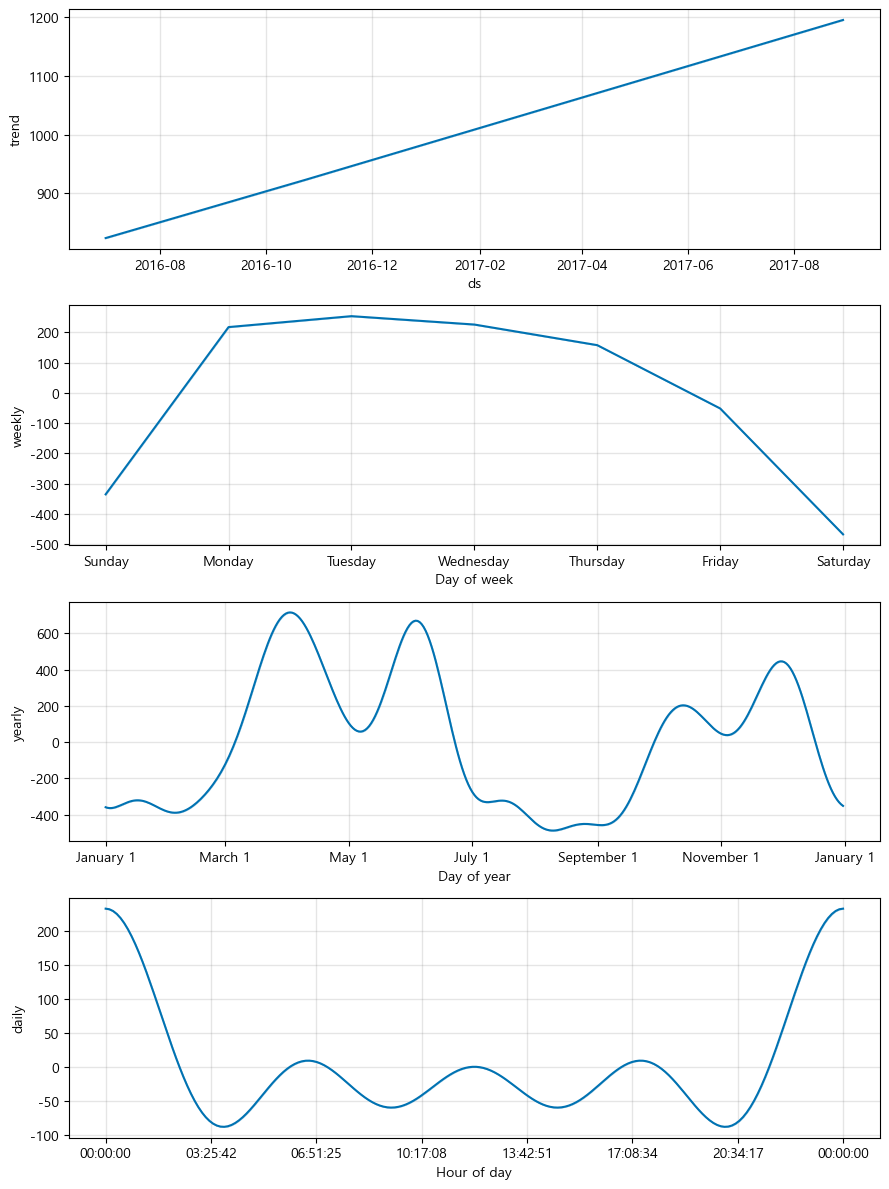

In [52]:
m.plot_components(forecast)